# **Macro Analysis**

Se comparan 3 redes sociales:

- Github: Los nodos son usuarios de github y una arista une dos nodos cuando ambos
nodos se siguen el uno al otro. El grafo es no dirigido, solo se incluye una arista si el
nodo A sigue a B y viceversa. Los nodos tienen un atributo que indica si son
desarrolladores de Machine Learning o de Web (True si son de ML y False si son Web)
- Twitch: Los nodos son usuarios de Twitch y une dos nodos cuando ambos nodos se
siguen el uno al otro. El grafo es no dirigido, solo se incluye una arista si el nodo A sigue
a B y viceversa. Los nodos tienen un atributo que indica si hacen streaming de
contenido adulto o no.
- Facebook: Los nodos son paginas oficiales de Facebook y una arista une dos nodos
cuando ambos nodos se siguen el uno al otro. El grafo es no dirigido, solo se incluye
una arista si el nodo A sigue a B y viceversa. Los nodos tienen un atributo con el tipo de
página de Facebook (politicians, governmental organizacions, television shows y
companies)

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from pyvis.network import Network

def str_color(r,g,b,a):
    return "#" + format(int(r*255), f'0{2}x') + format(int(g*255), f'0{2}x') + format(int(b*255), f'0{2}x') + format(int(a*255), f'0{2}x')

def assign_colors(values):
    colormap = plt.cm.magma  # You can choose any other colormap, like 'viridis', 'plasma', 'inferno', 'magma', etc.

    # Normalize your values to be in the range [0, 1] if they are not already
    norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

    # Create a colormap scalar mappable
    sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])

    # Map your values to colors
    colors = [str_color(*colormap(norm(value))) for value in values]
    return colors

In [56]:
def macro_study(G, name, list_operators):
    print("###################################################")
    print(f"### ANALISIS MACRO DE LA RED {name}")
    print("###################################################")

    if list_operators[0] == 1:
        ###################################################
        ### Densidad red social ###
        print("### Densidad de aristas")
        ###################################################
        
        # colors = assign_colors([d for _,d in G.degree()])
        # plt.figure(figsize=(3,3))
        # nx.draw_kamada_kawai(G, node_color=colors, node_size=20)
    
        M = G.number_of_edges()
        total = (N*(N-1))/2
        print(f"Densidad de la red {name}: {M/total}")
        print("")

    if list_operators[1] == 1:
        ###################################################
        ### Grado de los nodos ###
        print(f"### Grado de red {name}")
        ###################################################
    
        sns.set_style("white")
        frequency = nx.degree_histogram(G)
        data = pd.DataFrame({
            "degree": list(range(len(frequency))),  
            "frequency": frequency 
        })
    
    
        sns.scatterplot(x="degree", y="frequency", data=data)
        
        plt.xscale('log')
        plt.yscale('log')
        plt.show()
        print("")

    if list_operators[2] == 1:
        ###################################################
        ### Numero de componentes conexas
        print("### Número de componentes conexas")
        ###################################################
        
        num_components = nx.number_connected_components(G)
        print(f"Número de componentes conexas: {num_components}")
        
        components = list(nx.connected_components(G))
        for i, comp in enumerate(components):
            print(f"Componente {i+1}: {len(comp)} nodos")
    
        print("")
    
        ### Estudio de diametro de las componentes conexas para conocer su extension (alargadas o estrechas)
        
        connected_components = nx.connected_components(G)        # return a list of group of nodes
        S = [G.subgraph(c).copy() for c in connected_components] # transform connected components into a list of graphs
    
        for i, c in enumerate(S):
            print(f"Componente conexa {i}:")
            
            diameter = nx.diameter(c)
            radius = nx.radius(c)
            print(f"Componente conexa {i}: radio: {radius}, diametro: {diameter}")

    if list_operators[3] == 1:
        ###################################################
        ### ¿Se forman clústeres en cada componente conexa? --> Clustering Coefficient
        print("### Detección de clústeres dentro de cada componente conexa")
        ###################################################
        
        for i, c in enumerate(S):
            print(f"Componente {i}:")
            
            # Clustering Coefficient
            clustering = nx.average_clustering(c)
            print(f"Coeficiente de agrupamiento promedio en la componente {i}: {clustering:.2f}")
            
            #  visualizacion de la componente con "color"
            colors = [d["color"] for _, d in c.nodes(data=True)]
            plt.figure(figsize=(5, 5))
            nx.draw_kamada_kawai(c, node_color=colors, node_size=50, edge_color="darkgray")
            plt.title(f"Componente {i} - Coef. de agrupamiento: {clustering:.2f}")
            plt.show()
            
        print("")

    if list_operators[4] == 1:
        ###################################################
        ### Homofilia entre usuarios
        print("### Estudio de homofilia entre usuarios")
        ###################################################
    
        # Si un grafo no tiene nodos con atributos, hay que asignarle a los nodos un color: puede asignarse el color en base al grado, clustering coefficient, etc.
        # homofilia en un atributo sobre color
        homophily_scores = []
        
        for i, c in enumerate(S):
            print(f"Componente {i}:")
            
            colors = [d["color"] for _, d in c.nodes(data=True)]
            
            # homofilia: la fracción de enlaces entre nodos del mismo color
            homophily = 0
            total_edges = 0
            for u, v in c.edges():
                if colors[u] == colors[v]:
                    homophily += 1
                total_edges += 1
            
            if total_edges > 0:
                homophily_score = homophily / total_edges
            else:
                homophily_score = 0
            
            homophily_scores.append(homophily_score)
            print(f"Homofilia en la componente {i} (por color): {homophily_score:.2f}")
        
        print(f"Homofilia promedio en la red: {sum(homophily_scores)/len(homophily_scores):.2f}")
        print("")


###################################################
### ANALISIS MACRO DE LA RED github
###################################################
### Densidad de aristas
Densidad de la red github: 28900.3

### Grado de red github


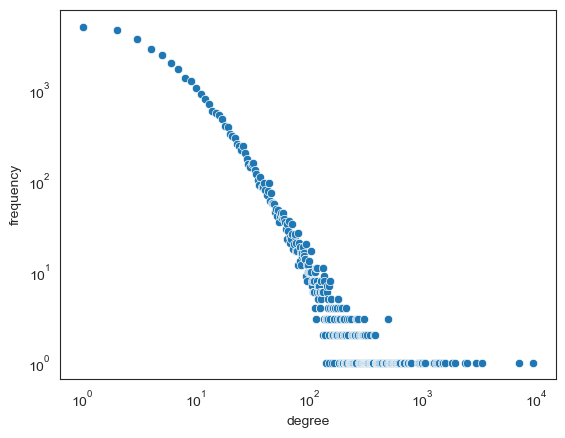


### Número de componentes conexas
Número de componentes conexas: 1
Componente 1: 37700 nodos

###################################################
### ANALISIS MACRO DE LA RED facebook
###################################################
### Densidad de aristas
Densidad de la red facebook: 17100.2

### Grado de red facebook


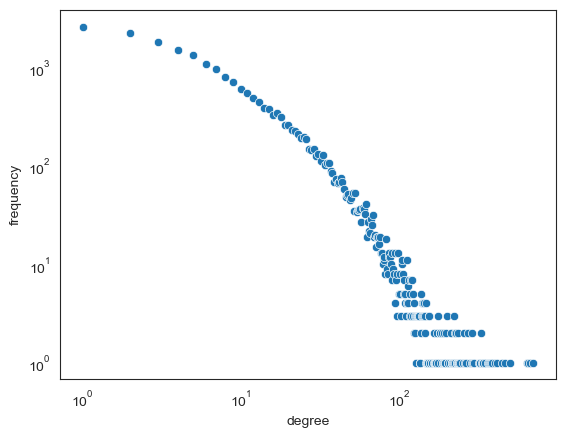


### Número de componentes conexas
Número de componentes conexas: 1
Componente 1: 22470 nodos

###################################################
### ANALISIS MACRO DE LA RED twitch
###################################################
### Densidad de aristas
Densidad de la red twitch: 3532.4

### Grado de red twitch


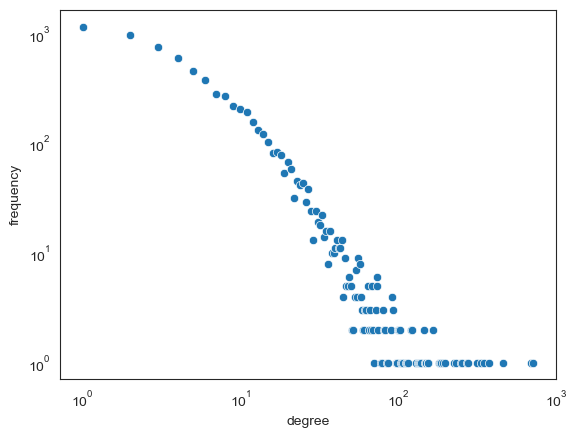


### Número de componentes conexas
Número de componentes conexas: 1
Componente 1: 7126 nodos



In [57]:
graphs = ['github', 'facebook', 'twitch']

for graph_file_name in graphs:
    G = nx.read_graphml(path = './' + graph_file_name + '.graphml')
    G = G.to_undirected()
    # 5 operators. 1,2,3 with '1', '0' to not execute last two operators
    macro_study(G, graph_file_name, [1,1,1,0,0])